In [7]:
using Condor
#=using Plots
using Healpix
using PyCall
using NPZ
hp = pyimport("healpy")
np = pyimport("numpy")
using StaticArrays
using PyPlot
using WignerD
using Falcons
using Base.Threads
using LinearAlgebra
#using BenchmarkTools
using HDF5
using ProgressMeter
using FFTW
#include("./eliptical/test_mapmaker.jl")
=#

solver_matrix_full (generic function with 1 method)

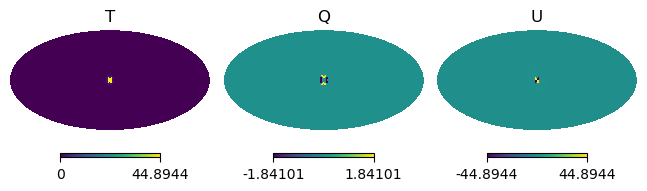

3×1176 Matrix{ComplexF64}:
 0.26105+0.0im  0.451946+0.0im  …  -3.61285e-20-6.67856e-20im
     0.0+0.0im       0.0+0.0im      1.30259e-19-9.03753e-20im
     0.0+0.0im       0.0+0.0im      1.16268e-20+2.23854e-20im

In [9]:
nside = 16
npix = nside2npix(nside)
res = Resolution(nside)
lmax = 3nside-1
fwhm = deg2rad(5)
xpeak,ypeak,zpeak = 0,0,1
gauss_map = gauss_3d_xyz(npix, fwhm, xpeak, ypeak, zpeak)
gauss_map_TQU = make_beam_TQU(gauss_map, npix, res)
hp.mollview(gauss_map_TQU[1,:], rot = (0,90), title = "T", sub = (1,3,1))
hp.mollview(gauss_map_TQU[2,:], rot = (0,90), title = "Q", sub = (1,3,2))
hp.mollview(gauss_map_TQU[3,:], rot = (0,90), title = "U", sub = (1,3,3))
gauss_blm = hp.map2alm(gauss_map_TQU)

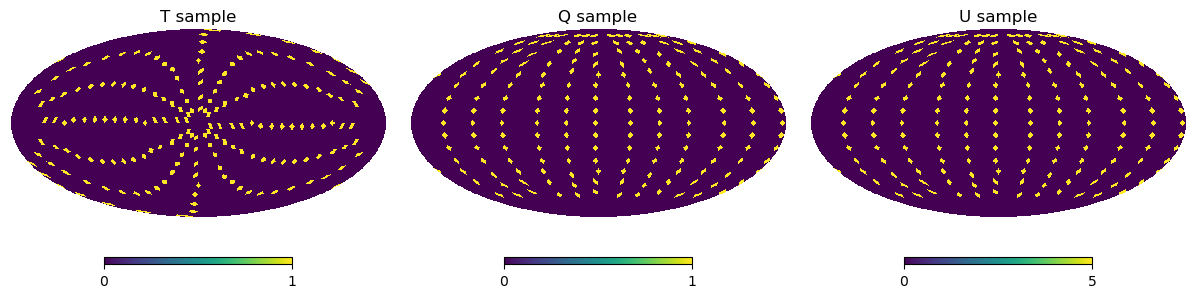

In [10]:
pointing_source = zeros(3, npix);
for theta in 10:10:150
    for phi in 1:30:360
        pix = ang2pixRing(res, deg2rad(theta), deg2rad(phi))
        pointing_source[1,pix] = 1
        pointing_source[2,pix] = 1
        pointing_source[3,pix] = 5
    end
end

plt.figure(figsize=[12, 8])
hp.mollview(pointing_source[1,:], sub = (1,3,1), title = "T sample", rot = (0,90))
hp.mollview(pointing_source[2,:], sub = (1,3,2), title = "Q sample")
hp.mollview(pointing_source[3,:], sub = (1,3,3), title = "U sample")

pointing_source_alm = hp.map2alm(pointing_source);

In [12]:
unique_θ = unique_theta(npix, res); #Calculate the value of θ by taking over the healpix rule

In [17]:
idx=1
dir="./test_idx==$idx"
FFTConv_demo(pointing_source_alm, gauss_blm, unique_θ, lmax, nside, idx, dir) # Output the convolution result in φψ space for the idxth θ.

l = 47
l = 46
l = 45
l = 44
l = 43
l = 42
l = 41
l = 40
l = 39
l = 38
l = 37
l = 36
l = 35
l = 34
l = 33
l = 32
l = 31
l = 30
l = 29
l = 28
l = 27
l = 26
l = 25
l = 24
l = 23
l = 22
l = 21
l = 20
l = 19
l = 18
l = 17
l = 16
l = 15
l = 14
l = 13
l = 12
l = 11
l = 10
l = 9
l = 8
l = 7
l = 6
l = 5
l = 4
l = 3
l = 2
l = 1
  0.022870 seconds (2.00 k allocations: 3.433 MiB)


In [19]:
# Enter the parameters of the orbit calculation

ss = gen_ScanningStrategy()

day = 60 * 60 * 24
year = day * 365

ss.nside = nside
ss.duration = year #[sec]
#ss.duration = 180day #[sec]
ss.sampling_rate = 1 #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 0.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"

ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0]

1-element Vector{Int64}:
 0

In [20]:
d_var , h= get_psi_make_TOD(ss, division = 1600, idx =idx, map_div=4, dir=dir) #Get the accumulated observations for a pixel from the trajectry information.

Progress: 100%|█████████████████████████████████████████| Time: 0:00:56


(ComplexF64[-0.03755927789413139 - 0.03252440390937723im -0.03755927789413139 + 0.03252440390937723im; -0.03756805582001053 - 0.03245635639990377im -0.03756805582001053 + 0.03245635639990377im; -0.037555167247421736 - 0.032517269861082464im -0.037555167247421736 + 0.032517269861082464im; -0.03760310801421764 - 0.032467763773791736im -0.03760310801421764 + 0.032467763773791736im], ComplexF64[-0.07150569283699588 + 0.007481443852588932im 0.012979044177873487 - 0.0022145086605780246im; -0.07096196930694391 + 0.007518437350923599im 0.01414297607592378 - 0.003005268831131676im; -0.07325379405880841 + 0.006694474311815299im 0.01307336457807571 - 0.0023701979777718107im; -0.07263474539701376 + 0.0072769127483115325im 0.014320779478993885 - 0.0024904956390291817im])

In [22]:
conved = solver_matrix(d_var,h) #Matrix calculation is performed and restored to map

h_matrix = ComplexF64[0.0032447610444683718 - 0.0005536271651445061im 0.25 + 0.0im; 0.25 + 0.0im 0.0032447610444683718 + 0.0005536271651445061im]
inv(h_matrix) = ComplexF64[-0.05192517844154749 - 0.008859570534238387im 4.000693558780614 + 0.0im; 4.000693558780614 + 0.0im -0.05192517844154749 + 0.008859570534238387im]
h_matrix = ComplexF64[0.003535744018980945 - 0.000751317207782919im 0.25 + 0.0im; 0.25 + 0.0im 0.003535744018980945 + 0.000751317207782919im]
inv(h_matrix) = ComplexF64[-0.05658373343946017 - 0.012023588920874677im 4.000836396505343 + 0.0im; 4.000836396505343 + 0.0im -0.05658373343946017 + 0.012023588920874677im]
h_matrix = ComplexF64[0.0032683411445189273 - 0.0005925494944429527im 0.25 + 0.0im; 0.25 + 0.0im 0.0032683411445189273 + 0.0005925494944429527im]
inv(h_matrix) = ComplexF64[-0.0523026913430094 - 0.00948246585742131im 4.000706247473741 + 0.0im; 4.000706247473741 + 0.0im -0.0523026913430094 + 0.00948246585742131im]
h_matrix = ComplexF64[0.0035801948697484712 - 0.000

2×4 Matrix{ComplexF64}:
 -0.0743005+0.0660709im  -0.0742841+0.0660704im  …  -0.0743066+0.0660667im
 -0.0743005-0.0660709im  -0.0742841-0.0660704im     -0.0743066-0.0660667im